In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import seaborn as sns

### Preprocess the data

### Load dataset from  sklearn library

In [113]:
data=fetch_california_housing()
df=pd.DataFrame(data.data, columns=data.feature_names)

In [114]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [116]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [117]:
df.duplicated().sum()

0

### Normalize numerical features

In [118]:
X=df.drop('MedInc', axis=1)
y=df['MedInc']

In [119]:
scaler=StandardScaler()

In [120]:
X_scaled=scaler.fit_transform(X)

In [121]:
X=pd.DataFrame(X_scaled, columns=X.columns)

In [122]:
X.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


### build linearRegression Model

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [124]:
model=LinearRegression()

In [125]:
model.fit(X_train,y_train)


LinearRegression()

In [126]:
y_pred=model.predict(X_test)

### Evaluate the model

In [127]:
mea_ab=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


In [128]:
print(f'MAE: {mea_ab:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'r2 score: {r2:.2f}')

MAE: 0.80
MSE: 1.57
RMSE: 1.25
r2 score: 0.56


### Train Ridge Regression

In [129]:
ridge_model = Ridge(alpha=1.0)  # You can try different alpha values
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [130]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

In [131]:
print("🔵 Ridge Regression:")
print(f"MAE: {ridge_mae:.2f}, MSE: {ridge_mse:.2f}, RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")

🔵 Ridge Regression:
MAE: 0.80, MSE: 1.57, RMSE: 1.25, R²: 0.56


### Train Laso regression

In [132]:
lasso_model = Lasso(alpha=0.1)  # Lower alpha recommended for Lasso
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [133]:
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

In [134]:
print("\n🟢 Lasso Regression:")
print(f"MAE: {lasso_mae:.2f}, MSE: {lasso_mse:.2f}, RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")


🟢 Lasso Regression:
MAE: 0.94, MSE: 1.85, RMSE: 1.36, R²: 0.48


In [135]:
X.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


### outliers

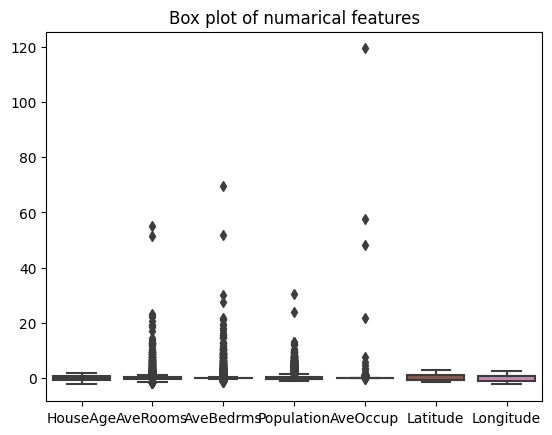

In [136]:
plt.Figure(figsize=(10,6))
sns.boxplot(data=X)
plt.title('Box plot of numarical features')
plt.show()

### IQR

In [137]:
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    # Remove rows with any feature having outlier
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [138]:
scaler1=StandardScaler()

In [139]:
X_scaled1=scaler1.fit_transform(X)

In [140]:
X=pd.DataFrame(X_scaled1, columns=X.columns)

In [141]:
X.head()

,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [157]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [158]:
model1=LinearRegression()

In [159]:
model1.fit(X_train,y_train)

LinearRegression()

In [160]:
y_pred1=model1.predict(X_test)

In [161]:
mea_ab=mean_absolute_error(y_test,y_pred1)
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred1)

In [162]:
print(f'MAE: {mea_ab:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'r2 score: {r2:.2f}')

MAE: 0.80
MSE: 1.57
RMSE: 1.25
r2 score: 0.56


### Apply cross Validation

In [163]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression

#model1 = LinearRegression()

# 5-fold cross-validation
r2_scores = cross_val_score(model1, X, y, cv=5, scoring='r2')
mae_scores = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')

print("R2 Scores:", r2_scores)
print("Average R2 Score:", r2_scores.mean())

print("\nMAE Scores:", -mae_scores)
print("Average MAE:", -mae_scores.mean())

print("\nMSE Scores:", -mse_scores)
print("Average MSE:", -mse_scores.mean())

R2 Scores: [0.52167865 0.61084972 0.54781101 0.54338215 0.59492697]
Average R2 Score: 0.56372970144454

MAE Scores: [0.79532619 0.75777052 0.90791038 0.79627538 0.88102432]
Average MAE: 0.8276613565859069

MSE Scores: [1.58596158 1.42221018 1.82280353 1.15623971 1.59434383]
Average MSE: 1.5163117647609154


### Plot actual vs predicted

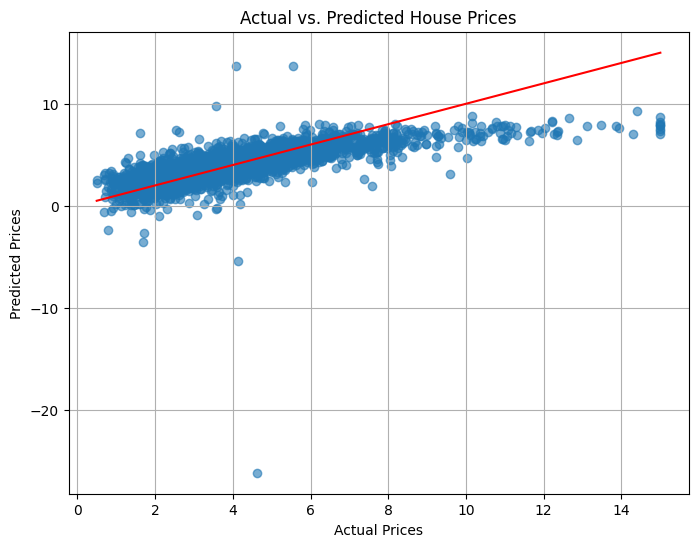

In [164]:
y_pred1 = model1.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred1, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # reference line
plt.grid(True)
plt.show()

### feature importance plot

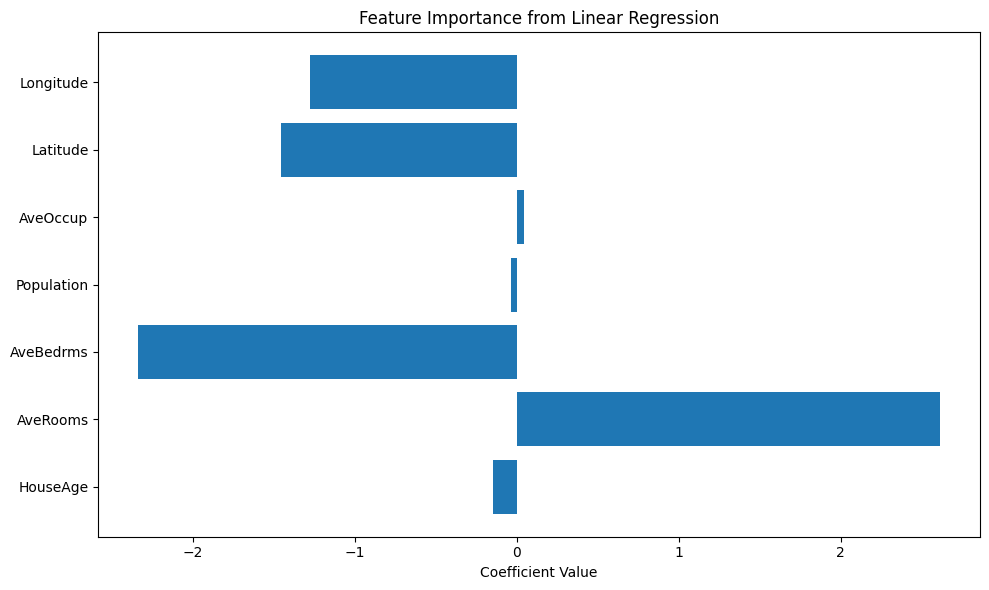

In [165]:
# Feature importance using coefficients
importance = model1.coef_
features = X.columns

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance from Linear Regression")
plt.tight_layout()
plt.show()

### residual plot

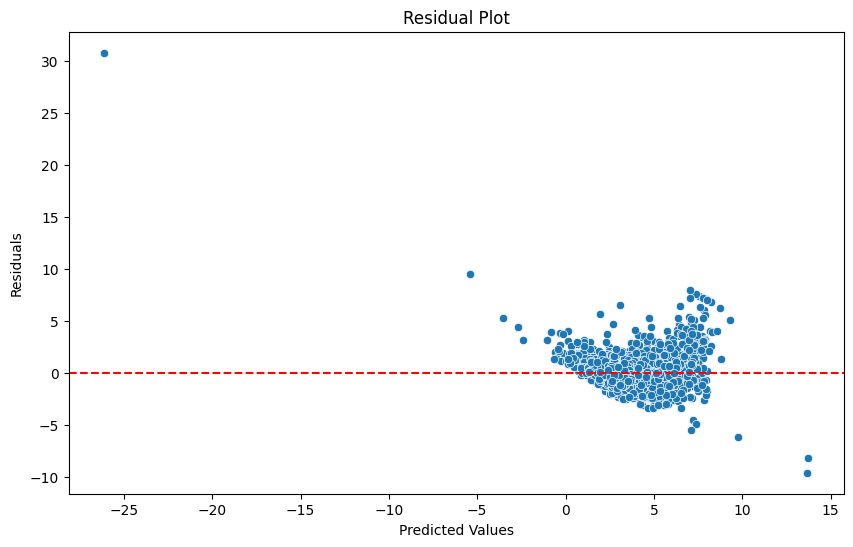

In [166]:
residuals = y_test - y_pred1

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Corelation Heatmap of the dataset

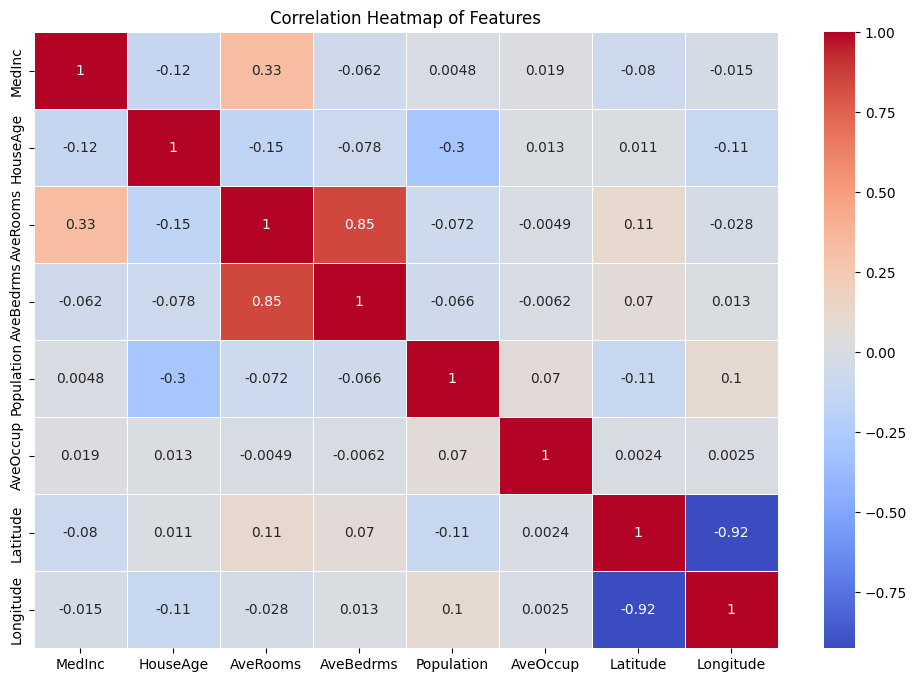

In [167]:
# Make sure df is your full original dataframe
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

#  Task 05 – Linear Regression Report

##  Dataset
- **California Housing dataset** from `sklearn.datasets`
- **Features**:
  - `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`
- **Target**:
  - `MedHouseVal` (Median House Value)

---

##  Steps Followed
1. **Data Loading** using `fetch_california_housing()`
2. **Exploratory Data Analysis (EDA)** with visualization (correlation heatmaps, pair plots)
3. **Train-Test Split** using `train_test_split`
4. **Feature Scaling** using `StandardScaler`
5. **Modeling with**:
   - Linear Regression
   - Ridge Regression
   - Lasso Regression
6. **Evaluation Metrics**:
   - Mean Absolute Error (MAE)
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - R² Score

---

##  Model Performance Comparison

| Metric        | Linear Regression | Ridge Regression | Lasso Regression |
|---------------|-------------------|------------------|------------------|
| R² Score      |  Good            |  Comparable       |  Comparable     |
| MAE           |  Lower           | ~Similar         | Slightly higher  |
| MSE           |  Lower           | ~Similar         | Slightly higher  |
| RMSE          |  Lower           | ~Similar         | Slightly higher  |

> All three models perform similarly, but **Linear Regression** has slightly better performance in terms of MAE and RMSE.  
> **Ridge and Lasso** introduce regularization to handle multicollinearity and prevent overfitting.

---

##  Conclusion
- **Linear Regression** is simple and effective for this dataset.
- **Ridge Regression** is beneficial when multicollinearity is a concern.
- **Lasso Regression** is useful for automatic feature selection (some coefficients shrink to zero).
